In [1]:
%load_ext autoreload
%autoreload 2

from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [2]:
# python3 select_view.py --data-dir DDD --scene SSSS --chunk CCC --overlap 0.5 --output-dir XXX

In [3]:
import os
import sys
sys.path.append('/Users/artonson/repos/frustum_chunk_intersection')

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import trimesh.transformations as tt

In [281]:
from src.voxel_chunk_data import VoxelDataPaths
from src.plotting import (
    display_3d, PointsPlottable, CameraPlottable, VolumePlottable,
    CameraFrustumPlottable)
from src.colors import rgb_to_packed_colors
from src.camera_pose import CameraPose
from src.frustum import CameraFrustum

In [240]:
paths = VoxelDataPaths(
    data_root='/Users/artonson/tmp/spsg/',
    scene_id='D7N2EKCX4Sj',
    room_id='9',
    chunk_id='*',)

paths.load()

In [241]:
full_volume = paths.full_volume
full_volume.plot_type = 'points'

In [242]:
for chunk_volume in paths.chunk_volumes:
    chunk_volume.plot_type = 'points'

In [282]:
# CameraFrustumPlottable(
#     camera_pose=CameraPose(paths.camera_views[537].extrinsics),
#     focal_length=paths.camera_views[537].intrinsics[0, 0],
#     image_size=np.array([320, 256]),
#     principal_point=paths.camera_views[537].intrinsics[[0, 1], 2],
#     sensor_size=np.array([0.001, 0.00075])
# )

In [277]:
paths.camera_views.keys()

dict_keys([537, 1671, 2138, 2139, 3273, 3740, 3741, 3742])

In [258]:
paths.camera_views[537].rgb.shape

(256, 320, 3)

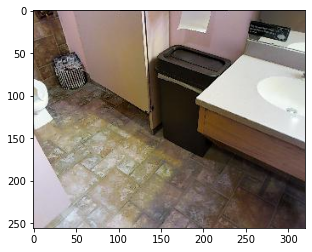

In [278]:
view = paths.camera_views[3273]
plt.imshow(view.rgb)

In [297]:
frustum = CameraFrustum(view.extrinsics, [view.intrinsics, view.intrinsics])
points = paths.full_volume.voxels_xyz
mask = frustum.is_visible(points)

In [310]:
projected_points = tt.transform_points(
    CameraPose(view.extrinsics).world_to_camera(points), 
    view.intrinsics)

In [321]:
view.intrinsics

array([[269.082,   0.   , 159.661,   0.   ],
       [  0.   , 269.135, 127.168,   0.   ],
       [  0.   ,   0.   ,   1.   ,   0.   ],
       [  0.   ,   0.   ,   0.   ,   1.   ]])

In [326]:
mask = (projected_points[:, 0] > 0) & (projected_points[:, 0] < 320) \
    & (projected_points[:, 1] > 0) & (projected_points[:, 1] < 256) \
    & (projected_points[:, 2] > 0)

In [327]:
points[mask].shape

(6598, 3)

In [320]:
 _ = display_3d(
    PointsPlottable(points, point_size=0.02),
     PointsPlottable(
         points[mask], 
         point_size=0.02,
         point_color=0xff0000),
    CameraFrustumPlottable(
        camera_pose=CameraPose(paths.camera_views[3273].extrinsics),
        focal_length=[paths.camera_views[3273].intrinsics[0, 0]],
        image_size=np.array([320, 256]),
        principal_point=paths.camera_views[3273].intrinsics[[0, 1], 2],
        sensor_size=np.array([320, 256]),
        line_length=0.01,
    ),
    height=1024
)

/Users/artonson/.pyenv/versions/3.8.6/envs/scannetpp-3.8.6/lib/python3.8/site-packages/traittypes/traittypes.py:97: UserWarning: Given trait value dtype "float64" does not match required type "float32". A coerced copy has been created.
  warnings.warn(
/Users/artonson/.pyenv/versions/3.8.6/envs/scannetpp-3.8.6/lib/python3.8/site-packages/traittypes/traittypes.py:97: UserWarning: Given trait value dtype "int64" does not match required type "uint32". A coerced copy has been created.
  warnings.warn(


Output()

In [279]:
 _ = display_3d(
    paths._data,
#     full_volume,
#     chunk_volume,
#     view,
    CameraFrustumPlottable(
        camera_pose=CameraPose(paths.camera_views[3273].extrinsics),
        focal_length=[paths.camera_views[3273].intrinsics[0, 0]],
        image_size=np.array([320, 256]),
        principal_point=paths.camera_views[3273].intrinsics[[0, 1], 2],
        sensor_size=np.array([320, 256]),
        line_length=0.01,
    ),
    height=1024
)

Output()

In [36]:
paths.chunk_volumes[0].id

'1'

In [37]:
_ = display_3d(
    VolumePlottable(
    sdf < 0.1)
)

/Users/artonson/.pyenv/versions/3.8.6/envs/scannetpp-3.8.6/lib/python3.8/site-packages/k3d/objects.py:1292: UserWarning: wrong dtype: bool ([<class 'numpy.float16'>, <class 'numpy.float32'>] required)
  warnings.warn("wrong dtype: %s (%s required)" % (actual, required))


Output()

In [ ]:
[view.extrinsics for view in paths.camera_views]

In [ ]:
_ = display_3d(
    PointsPlottable(
        points=tt.transform_points(
            full_volume.room_locs[room_mask], full_volume.room_transform),
        point_colors=rgb_to_packed_colors(colors[room_mask, 0], colors[room_mask, 1], colors[room_mask, 2]),
        point_size=100.0,),
    *[CameraPlottable(
        CameraPose(view.extrinsics),
        line_length=1000.0,
        line_width=10.0) for view in paths.camera_views],
    height=1024,
)

In [ ]:
tt.transform_points(
            full_volume.room_locs[room_mask], full_volume.room_transform)

In [ ]:
_ = display_3d(
    full_volume
)

In [ ]:
from contrib.plotting import *
from contrib.sdf_reader import load_sdf

In [ ]:
@dataclass
class VolumePlottable(Plottable):
    volume: np.array
    color_map: str = 'jet'
    order: str = 'xyz'
    interpolation: bool = False
    model_matrix: np.array = None
    
    def plot(self, k3d_plot):
        if None is self.volume:
            return
        volume = self.volume if self.order == 'xyz' else np.transpose(self.volume, (2, 1, 0))
        args = dict(
            volume=volume,
            interpolation=self.interpolation,
            model_matrix=self.model_matrix
        )
        assert None is not self.color_map, 'colormap must be specified'
#         if isinstance(self.color_map, str):
#             self.color_map = getattr(k3d.colormaps.matplotlib_color_maps, self.color_map)
#         color_map = k3d.helpers.map_colors(
#             np.arange(0, 255), self.color_map, (0, 255)
#         ).astype(np.uint32)
#         args['color_map'] = self.color_map

        k3d_plot += k3d.volume(**args)


In [ ]:
from src.sdf_reader import load_sdf
sdf, sdf_transform, known, colors = load_sdf(
    file='/Users/artonson/tmp/spsg/data-geo-color/D7N2EKCX4Sj_room9__cmp__0.sdf',
    load_sparse=False,
    load_known=False,
    load_colors=True,
    color_file=None)
sdf[sdf==-np.inf] = np.inf

In [ ]:
from src.plotting import Plottable, VolumePlottable, PointsPlottable, \
    CameraPlottable, CameraFrustumPlottable

_ = display_3d(
    VolumePlottable(
        sdf < .01,
        color_map='jet_r',
    ),
    height=1024,
)

In [ ]:
(room_locs, room_sdf), room_shape, room_transform, room_known, room_colors = load_sdf(
    file='/Users/artonson/tmp/spsg/mp_sdf_2cm_input/D7N2EKCX4Sj_room9__0__.sdf',
    load_sparse=True, 
    load_known=False,
    load_colors=True, 
    color_file='/Users/artonson/tmp/spsg/mp_sdf_2cm_input/D7N2EKCX4Sj_room9__0__.colors')

In [ ]:
room = np.ones(room_shape, dtype=np.float32) * np.inf

In [ ]:
room[room_locs[:, 0], room_locs[:, 1], room_locs[:, 2]] = room_sdf

In [ ]:
import k3d
k3d.volume?

In [ ]:
_ = display_3d(
    VolumePlottable(
        room < .01,
        color_map='jet_r',
        interpolation=False,
        model_matrix=room_transform,
    ),
#     VolumePlottable(
#         sdf < .01,
#         color_map='jet',
#         interpolation=False,
#         model_matrix=sdf_transform,
#     ),
    height=1024,
)

In [ ]:
import glob

from PIL import Image as PilImage

In [ ]:
df_indexes_by_slice = {}
for filename in glob.glob('/Users/artonson/tmp/spsg/data-frames/D7N2EKCX4Sj_room9__cmp__*.txt'):
    scene_room, dtype, s = os.path.basename(filename).split('__')
    s = int(os.path.splitext(s)[0])
    df_indexes = np.loadtxt(filename, dtype=np.int_)
    df_indexes_by_slice[s] = df_indexes

In [ ]:
camera_params = np.loadtxt('/Users/artonson/tmp/spsg/images/D7N2EKCX4Sj/camera/0.txt')
extrinsics, intrinsics = camera_params[:4], camera_params[4:]

image = PilImage.open('/Users/artonson/tmp/spsg/images/D7N2EKCX4Sj/color/1.jpg')
image_array = np.asarray(image)

In [ ]:
image = PilImage.open('/Users/artonson/tmp/spsg/images/D7N2EKCX4Sj/depth/1.png')
image_array = np.asarray(image, dtype=np.float_)

In [ ]:
image_to_display = image_array.copy()
background_idx = image_to_display == 0.
image_to_display[background_idx] = np.nan

plt.imshow(image_to_display)

In [ ]:
for camera_idx in df_indexes_by_slice[0]:
    

In [ ]:
class VoxelChunkData:
    def __init__():
        pass
    
    def _load():
        pass

    def load():
        self._load()
    
    def compute_voxel_visibility():
        pass